In [66]:
import pandas as pd
import numpy as np

df = pd.read_csv("palghar_rates.csv")
df.replace("Price on Request", np.nan, inplace = True)
df.head(10)

,Unnamed: 0,Area,Type,Price,Apartment Name
0,0,"Tembhode, Palghar",2 BHK Apartment,28.49 L - 39.59 L,Nisarg Shrushti Phase 1
1,1,"Amba Wadi, Palghar",1 BHK Apartment,12.62 L - 14.15 L,Saraswati Mateshwari Complex
2,2,"Bachu Bhai Dube Industrial Estate, Palghar","1, 2 BHK Apartments",24.05 L - 31.82 L,Rajesh Mahavir Gyan
3,3,"Haranwali, Palghar","1, 2 BHK Apartments",15.74 L - 22.2 L,Laxmi Complex
4,4,"Bachu Bhai Dube Industrial Estate, Palghar","1, 2 BHK Apartments",NaN,Rajesh Mahavir Chhaya
5,5,"Haranwali, Palghar","1, 2 BHK Apartments",18.89 L - 27.59 L,Aditya Shail Kunj
6,6,"Haranwali, Palghar",2 BHK Apartment,NaN,Ipsit Sweet Home Building 1
7,7,"Saphale, Palghar","2, 3 BHK Apartments",NaN,Prem Indraprastha 4
8,8,"Haranwali, Palghar",1 BHK Apartment,16.8 L,Sai Pooja Satyam Enclave
9,9,"Boisar, Palghar","1, 2, 3 BHK Apartments",22.42 L - 34.2 L,Sai Rydam Vibrant Homes


In [67]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["Price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)
df.head()

,Unnamed: 0,Area,Type,Price,Apartment Name
0,0,"Tembhode, Palghar",2 BHK Apartment,28.49 L - 39.59 L,Nisarg Shrushti Phase 1
1,1,"Amba Wadi, Palghar",1 BHK Apartment,12.62 L - 14.15 L,Saraswati Mateshwari Complex
2,2,"Bachu Bhai Dube Industrial Estate, Palghar","1, 2 BHK Apartments",24.05 L - 31.82 L,Rajesh Mahavir Gyan
3,3,"Haranwali, Palghar","1, 2 BHK Apartments",15.74 L - 22.2 L,Laxmi Complex
4,5,"Haranwali, Palghar","1, 2 BHK Apartments",18.89 L - 27.59 L,Aditya Shail Kunj


In [68]:
df['Price'] = df.Price.str.replace('L', '')

In [69]:
df.rename(columns = {"Price":"Price in Lakhs"},inplace = True)
df.head()

,Unnamed: 0,Area,Type,Price in Lakhs,Apartment Name
0,0,"Tembhode, Palghar",2 BHK Apartment,28.49 - 39.59,Nisarg Shrushti Phase 1
1,1,"Amba Wadi, Palghar",1 BHK Apartment,12.62 - 14.15,Saraswati Mateshwari Complex
2,2,"Bachu Bhai Dube Industrial Estate, Palghar","1, 2 BHK Apartments",24.05 - 31.82,Rajesh Mahavir Gyan
3,3,"Haranwali, Palghar","1, 2 BHK Apartments",15.74 - 22.2,Laxmi Complex
4,5,"Haranwali, Palghar","1, 2 BHK Apartments",18.89 - 27.59,Aditya Shail Kunj


In [70]:
df = df[['Area','Type','Price in Lakhs','Apartment Name']]
df.head()

,Area,Type,Price in Lakhs,Apartment Name
0,"Tembhode, Palghar",2 BHK Apartment,28.49 - 39.59,Nisarg Shrushti Phase 1
1,"Amba Wadi, Palghar",1 BHK Apartment,12.62 - 14.15,Saraswati Mateshwari Complex
2,"Bachu Bhai Dube Industrial Estate, Palghar","1, 2 BHK Apartments",24.05 - 31.82,Rajesh Mahavir Gyan
3,"Haranwali, Palghar","1, 2 BHK Apartments",15.74 - 22.2,Laxmi Complex
4,"Haranwali, Palghar","1, 2 BHK Apartments",18.89 - 27.59,Aditya Shail Kunj


In [71]:
df.shape

(243, 4)

In [72]:
prices = list(df['Price in Lakhs'])
#print(prices)
price = []
for x in prices:
    if(len(x)<9):
        price.append(x)
print(len(price))

41


In [89]:
df1 = df[df['Price in Lakhs'].map(len) < 7]


df1["Price in Lakhs"] = df1["Price in Lakhs"].astype("float")
df1.dtypes

C:\Users\darsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Area               object
Type               object
Price in Lakhs    float64
Apartment Name     object
dtype: object

In [114]:
group = df1.groupby(["Type"]).mean()
group.head()

,Price in Lakhs
Type,
1 BHK Apartment,15.988571
1 RK Apartment,7.650000
1.5 BHK Apartment,24.860000
2 BHK Apartment,22.812500


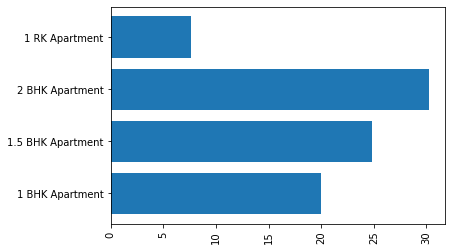

In [115]:
# importing matplotlib module  
from matplotlib import pyplot as plt 
  
x = df1['Type']
y = df1['Price in Lakhs']
  
# Function to plot the bar 
plt.barh(x,y)
plt.xticks(rotation=90)
  
# function to show the plot 
plt.show() 
